In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import math
import cv2

In [ ]:
plt.close('all')

x = np.arange(0, 4*np.pi, 0.1)

y1 = np.sin(x)

y2 = np.cos(x)

y3 = np.sin((np.pi/2)-x)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

ax1.plot(x, y1, color='b')
ax1.set_title('Sin function', fontsize=18)
ax2.plot(x, y2, color='g')
ax2.set_title('Cos function', fontsize=18)
ax3.plot(x, y3, color='r')
ax3.set_title('Shift Sin function 90 degree', fontsize=18)

plt.show()


In [ ]:
plt.close('all')

x = np.arange(0, 4*np.pi, 0.1)

y1 = np.sin(x)

y2 = (1/3)*np.sin(3*x)

y3 = y1 + y2

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

ax1.plot(x, y1, color='b')
ax1.set_title('Fourier Series', fontsize=18)

ax2.plot(x, y2, color='g')

ax3.plot(x, y3, color='r')

plt.show()


In [ ]:
plt.close('all')

N = 80

f, ((ax1), (ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
xf = np.zeros((N, N))
xf[0, 0] = 1
xf[0, N-4] = 1
Z = np.fft.ifft2(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax2.imshow(np.real(Z), cmap=cm.gray)
plt.show()

In [ ]:
plt.close('all')

N = 80

f, ((ax1), (ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
xf = np.zeros((N, N))
xf[0, 1] = 1
xf[0, N-5] = 1
Z = np.fft.ifft2(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax2.imshow(np.real(Z), cmap=cm.gray)
plt.show()

In [ ]:
plt.close('all')

N = 80

f, ((ax1), (ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
xf = np.zeros((N, N))
xf[5, 5] = 1
xf[N-5, 5] = 1
Z = np.fft.ifft2(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax2.imshow(np.real(Z), cmap=cm.gray)
plt.show()

In [ ]:
plt.close('all')

resx = 120
resy = 120
cx=resx/2
cy = resx/2

fxy = [[0 for x in range(resx)] for y in range(resy)]

for i in range(resx):
    for k in range(resy):
        if(k>=(cx-10)) and (k<=(cx+10)) and (i>=(cy-5)) and (i<=(cy+5)):
            fxy[i][k] = 1
        else:
            fxy[i][k] = 0

FS = np.fft.fftn(fxy)
fig = plt.figure(1, figsize=(10,8), frameon=False)
ax1 = fig.add_subplot(131)
ax1.imshow(fxy, cmap=cm.gray)
ax1.set_title("Orginal Image", fontsize=24)

ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax2 = fig.add_subplot(132)

ax2.imshow((np.abs(np.fft.fftshift(FS))))
ax2.set_title('FT', fontsize=24)

ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3 = fig.add_subplot(133, projection='3d')
X = np.arange(0, 120, 1)
Y = np.arange(0, 120, 1)
X, Y = np.meshgrid(X, Y)

surf = ax3.plot_surface(X, Y,(np.abs(np.fft.fftshift(FS))), cmap = 'seismic')

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import math
import cv2

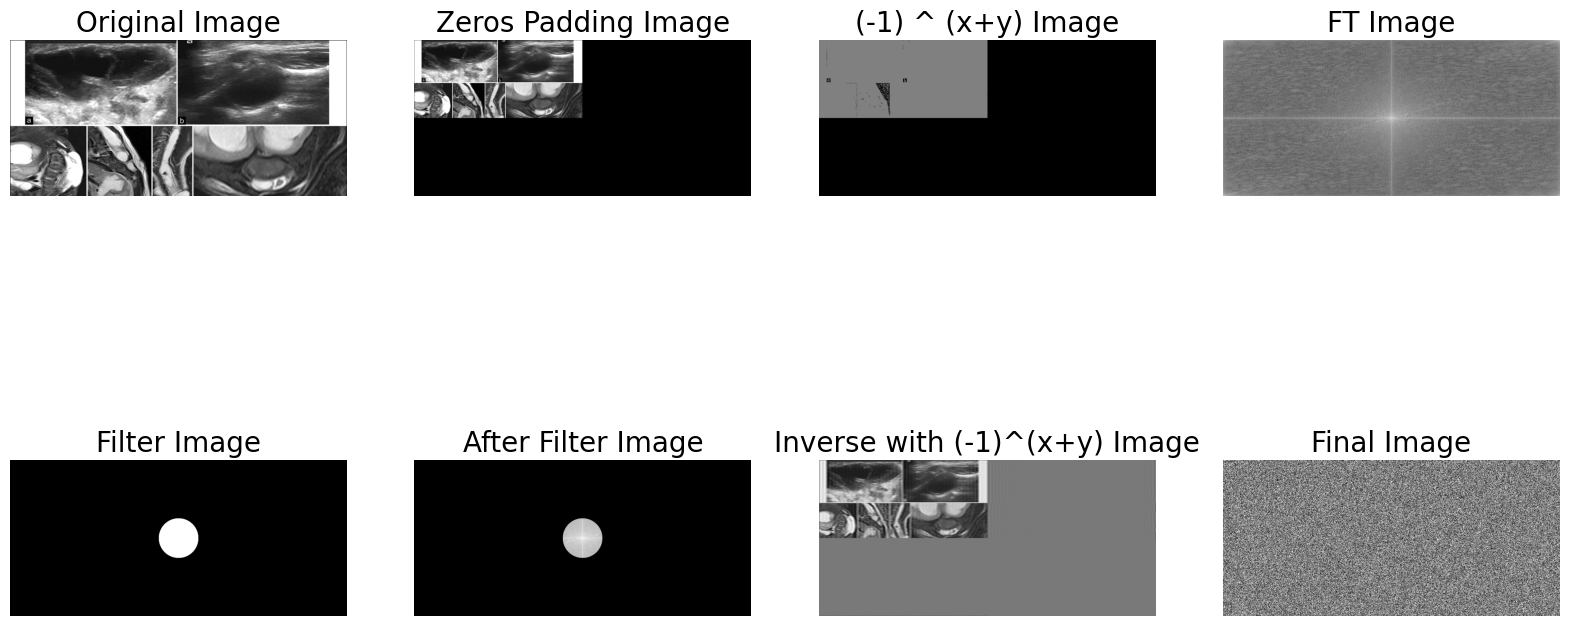

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import math
import cv2

path_image = r'C:\Users\porpu\Desktop\Code\CSS496\ultrasonic_scan.png'

im = cv2.imread(path_image, 0)

nim = np.zeros((2*im.shape[0], 2*im.shape[1]), dtype=im.dtype)
bnim = np.zeros((2*im.shape[0], 2*im.shape[1]), dtype=im.dtype)
for i in range(im.shape[0]):
    for k in range(im.shape[1]):
        nim[i][k] = im[i][k]
        bnim[i][k] = ((-1)**(i+k))*im[i][k]

FS = np.fft.fftn(bnim)

filt = np.zeros((2*im.shape[0],2*im.shape[1]), dtype=im.dtype)
center = (im.shape[1], im.shape[0])
radians = 100
cv2.circle(filt, center, radians, (255,255,255), -1)

G = filt*FS

gt = np.real(np.fft.ifftn(G))

for i in range(gt.shape[0]):
    for k in range(gt.shape[1]):
        gt[i][k] = ((-1)**(i+k))*gt[i][k]

final = np.zeros((im.shape[0], im.shape[1]), dtype=im.dtype)
for i in range(final.shape[0]):
    for k in range(final.shape[1]):
        final[i][k] = gt[i][k]

plt.figure(figsize=(20, 10))

plt.subplot(241)
plt.imshow(im, 'gray')
plt.title('Original Image', fontsize=20)
plt.axis('off')


plt.subplot(242)
plt.imshow(nim, 'gray')   
plt.title('Zeros Padding Image', fontsize=20)
plt.axis('off')

plt.subplot(243)
plt.imshow(bnim, 'gray')
plt.title('(-1) ^ (x+y) Image', fontsize=20)
plt.axis('off')

plt.subplot(244)
plt.imshow(20*np.log(np.abs(FS)), 'gray')
plt.title('FT Image', fontsize=20)
plt.axis('off')

plt.subplot(245)
plt.imshow(filt, 'gray')
plt.title('Filter Image', fontsize=20)
plt.axis('off')

plt.subplot(246)
plt.imshow(20*np.log(np.abs(G)+1), 'gray')
plt.title('After Filter Image', fontsize=20)
plt.axis('off')

plt.subplot(247)
plt.imshow(gt, 'gray')
plt.title('Inverse with (-1)^(x+y) Image', fontsize=20)
plt.axis('off')

plt.subplot(248)
plt.imshow(final, 'gray')
plt.title('Final Image', fontsize=20)
plt.axis('off')

plt.show()
